Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23093 entries, 0 to 23092
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         23093 non-null  object 
 1   District      23093 non-null  object 
 2   Market        23093 non-null  object 
 3   Commodity     23093 non-null  object 
 4   Variety       23093 non-null  object 
 5   Grade         23093 non-null  object 
 6   Arrival_Date  23093 non-null  object 
 7   Min Price     23093 non-null  float64
 8   Max Price     23093 non-null  float64
 9   Modal Price   23093 non-null  float64
dtypes: float64(3), object(7)
memory usage: 1.8+ MB
None

Missing Values:
State           0
District        0
Market          0
Commodity       0
Variety         0
Grade           0
Arrival_Date    0
Min Price       0
Max Price       0
Modal Price     0
dtype: int64

Summary Statistics:
           Min Price      Max Price    Modal Price
count   23093.000000  

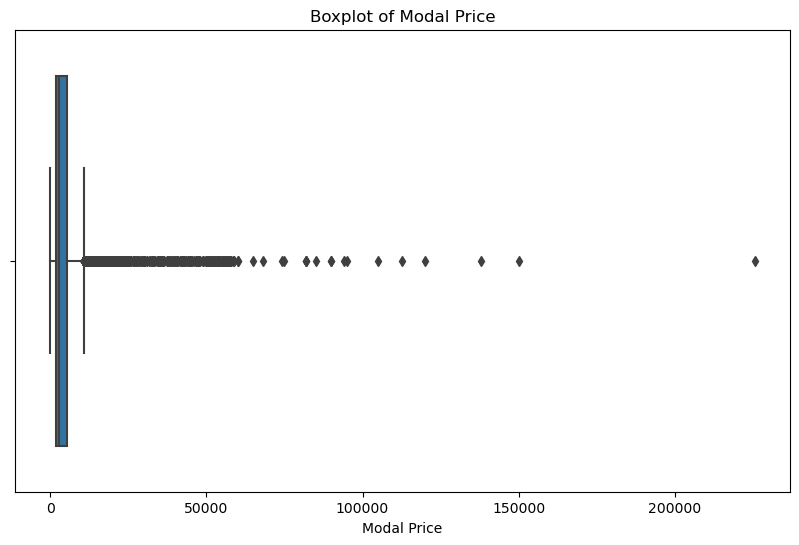

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


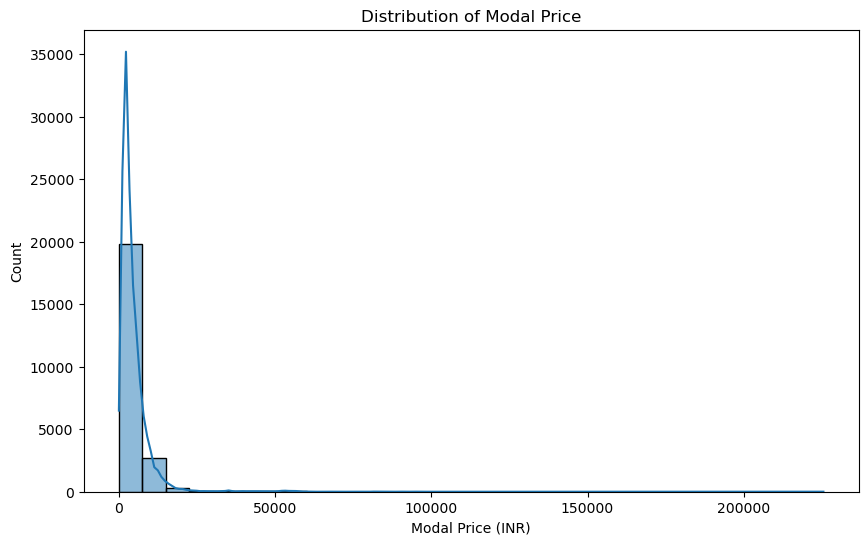

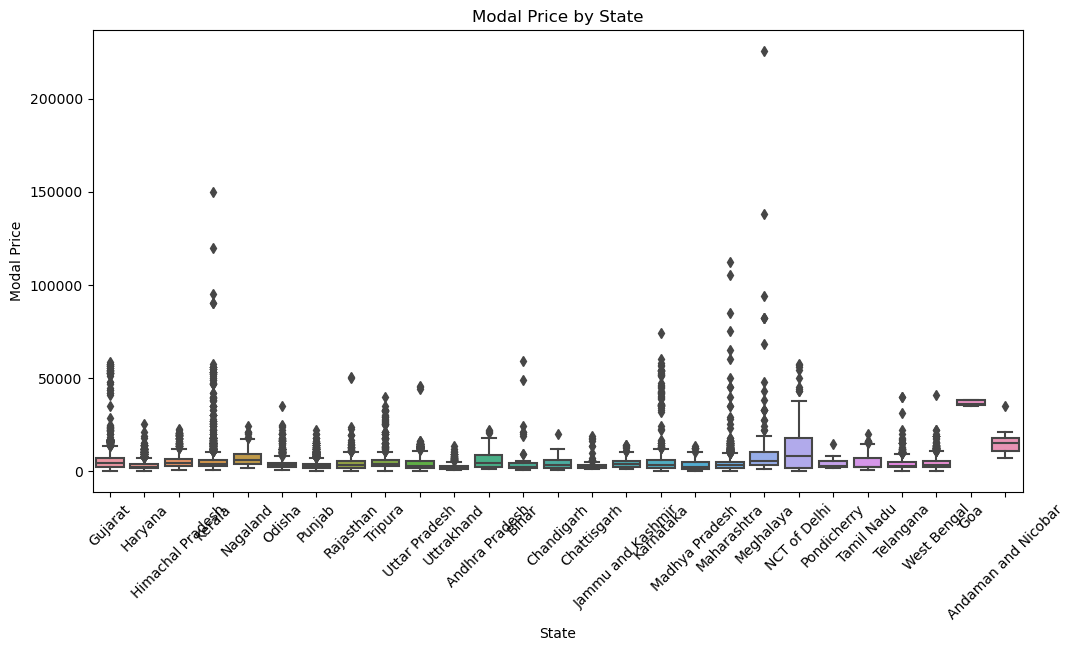

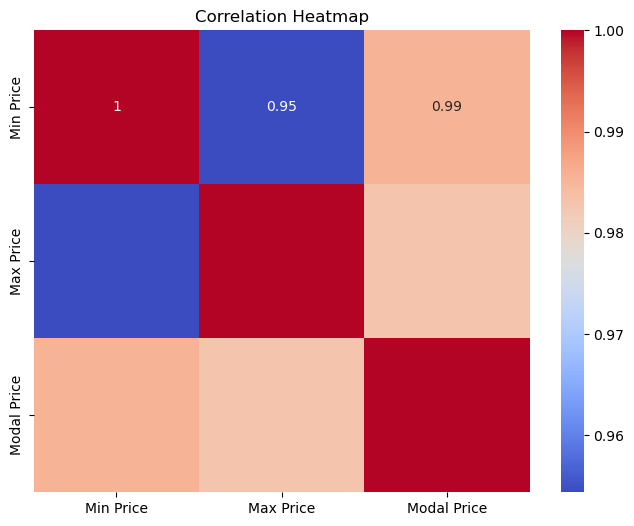


Model Performance:
Mean Absolute Error (MAE): 84.18 INR
Root Mean Squared Error (RMSE): 247.94 INR
R² Score: 1.00

Feature Importance:
     Feature  Importance
6  Max Price    0.817619
5  Min Price    0.178091
4    Variety    0.001000
1   District    0.000872
2     Market    0.000840
3  Commodity    0.000718
0      State    0.000703
7        Day    0.000123
8      Month    0.000035
9       Year    0.000000


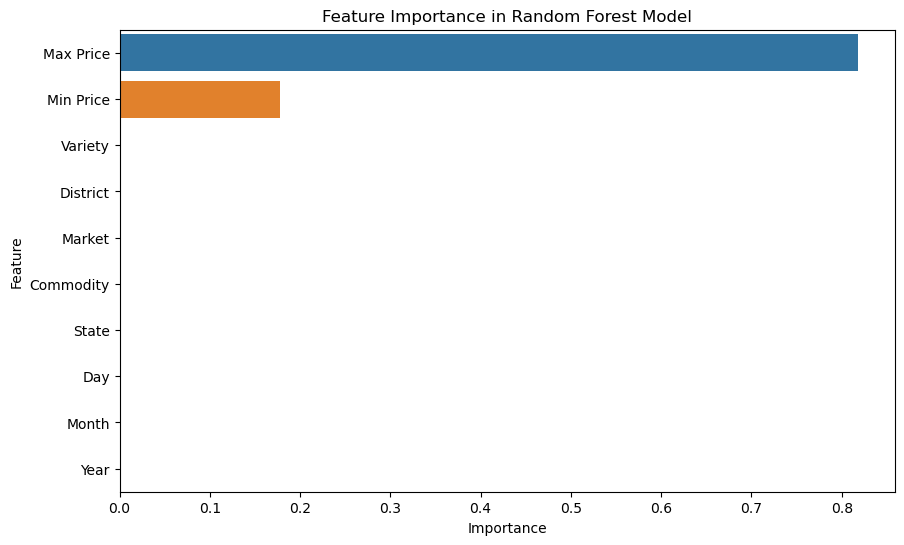


Predicted Modal Price for new data: 9248.66 INR


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


df = pd.read_csv('C:\\Users\\Atharva Digambar\\OneDrive\\Desktop\\Price_Agriculture_commodities_Week.csv') 


print("Dataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())


print("\nSummary Statistics:")
print(df.describe())


df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'], format='%d-%m-%Y')


plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Modal Price'])
plt.title('Boxplot of Modal Price')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(df['Modal Price'], bins=30, kde=True)
plt.title('Distribution of Modal Price')
plt.xlabel('Modal Price (INR)')
plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(x='State', y='Modal Price', data=df)
plt.xticks(rotation=45)
plt.title('Modal Price by State')
plt.show()


plt.figure(figsize=(8, 6))
sns.heatmap(df[['Min Price', 'Max Price', 'Modal Price']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


df['Modal Price'] = df['Modal Price'].clip(upper=20000)


df['Day'] = df['Arrival_Date'].dt.day
df['Month'] = df['Arrival_Date'].dt.month
df['Year'] = df['Arrival_Date'].dt.year


df = df.drop(['Arrival_Date', 'Grade'], axis=1)

label_encoders = {}
categorical_columns = ['State', 'District', 'Market', 'Commodity', 'Variety']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  


X = df.drop('Modal Price', axis=1)
y = df['Modal Price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f} INR")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} INR")
print(f"R² Score: {r2:.2f}")


feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Random Forest Model')
plt.show()

new_data = pd.DataFrame({
    'State': [label_encoders['State'].transform(['Gujarat'])[0]],
    'District': [label_encoders['District'].transform(['Amreli'])[0]],
    'Market': [label_encoders['Market'].transform(['Damnagar'])[0]],
    'Commodity': [label_encoders['Commodity'].transform(['Tomato'])[0]],
    'Variety': [label_encoders['Variety'].transform(['Local'])[0]],
    'Min Price': [9000],
    'Max Price': [9500],
    'Day': [2],
    'Month': [8],
    'Year': [2023]
})

predicted_price = rf_model.predict(new_data)
print(f"\nPredicted Modal Price for new data: {predicted_price[0]:.2f} INR")